# Chloe Ting Data Analysis

Data collected using `data-collection-chrome-extension` were exported to CSV file.
This data is from https://www.youtube.com/watch?v=2pLT-olgUJs

## Set up plot function for feature that has array values

Each plot corresponds to the index of the array. Eg. First subplot of MFCC corresponds to first MFCC coeffient.

Area shaded in pink shows when Chloe is speaking. Non-shaded area is when background music is playing.

In [181]:
from CONSTANTS import CLASS_NAMES, CLASS_TO_INT, FEATURES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_filepath = './data/2020-07-26_06-35-07.csv'
df = pd.read_csv(csv_filepath, sep=',', header=0)

# Get dataframes for time and label
time = df['timestamp'] 
label = df['class']

def get_padding(min_val, max_val):
    return abs(min_val - max_val) * 0.05

def plotFeatureArray(sub_part, divide_factor, first_n_array, feature_name):
    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)
    sample = []
    
    for i in range(1, first_n_array + 1, 1):
        sample.append(df[feature_name + '_' + str(i)])

    fig, ax = plt.subplots(first_n_array, 1, figsize=(15,70))

    for i in range(len(sample)):
        # Divide sample into smaller chunks
        sample_split = np.array_split(sample[i], divide_factor)

        min_val = np.amin(sample_split[sub_part])
        max_val = np.amax(sample_split[sub_part])
        padding = get_padding(min_val, max_val)
        ylim = [ min_val - padding, max_val + padding]

        ax[i].set_ylim(ylim)
        ax[i].set_title(feature_name + '_' + str(i))
        ax[i].plot(time_split[sub_part], sample_split[sub_part])
        ax[i].fill_between(
            time_split[sub_part],
            ylim[0], ylim[1],
            where=label_split[sub_part] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
            color='lightcoral', alpha=0.2)

    # Show plot
    plt.show()

## Power Spectrum

Chrome extension is used to collect audio data from Youtube video. Sampling rate that was used was `48000 Hz`. When perform FFT, the result frequency range will be from 0 to half of sampling rate, which `24000 Hz`. The buffer size is `1024`, hence, there are `512` bins. Therefore, each bin has the range of `24000/512 = 46.875 Hz`.

### Analysis
- Human vocal ranges from about 100~300 Hz, which is bin #0-7
- Music can ranges from 50Hz to 4000 Hz or more
- Timer beep should be about 1000Hz

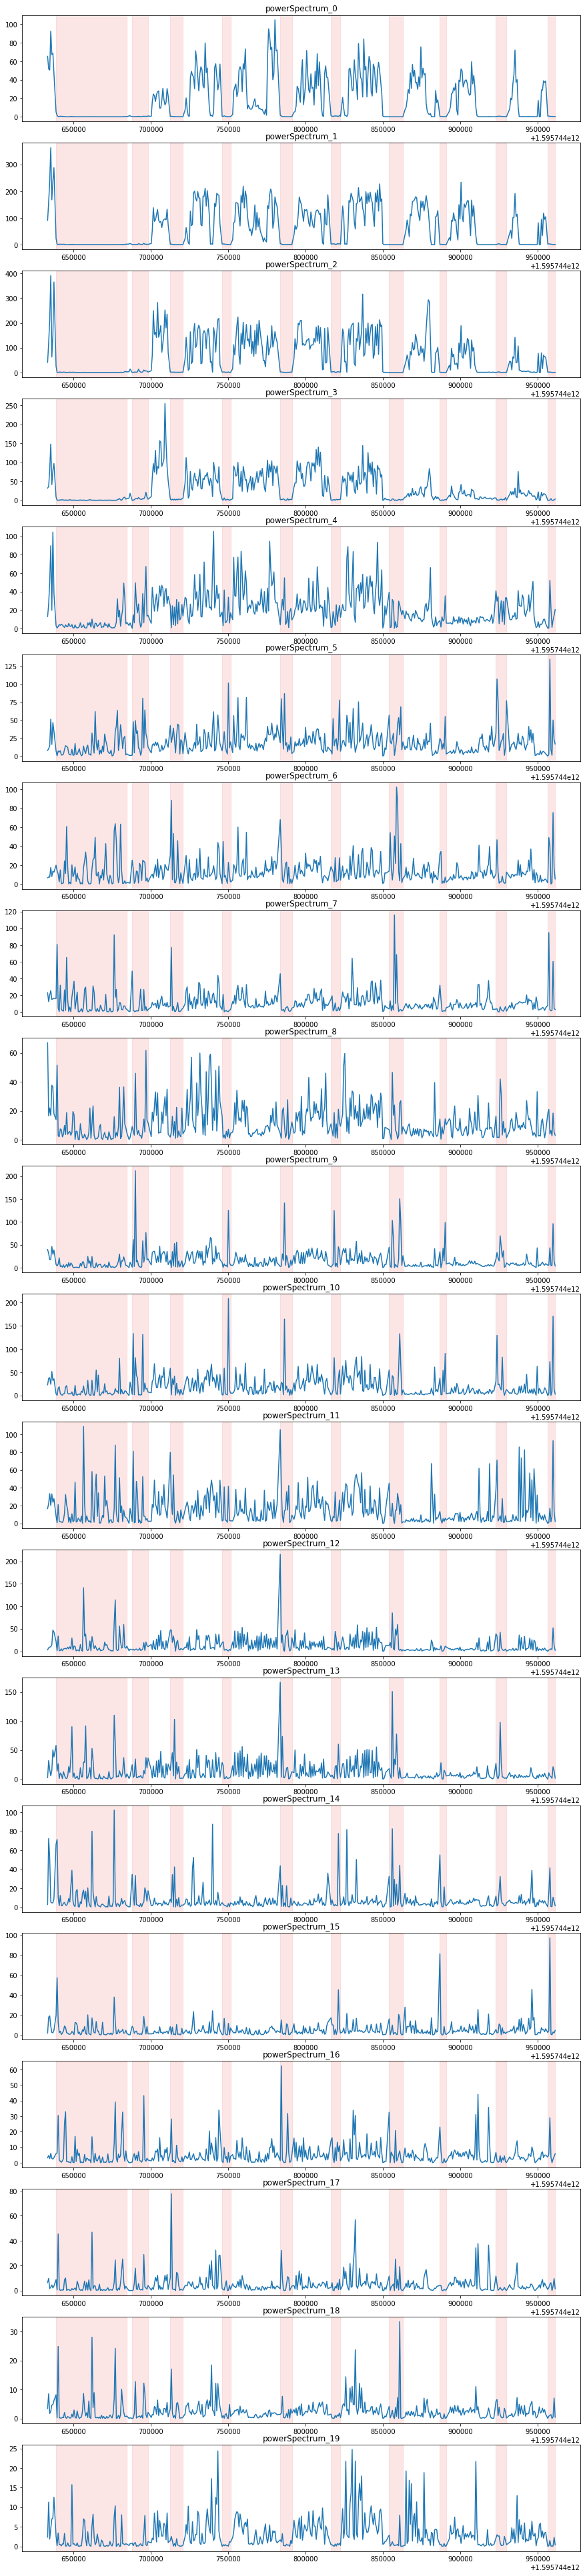

In [182]:
PS_DIVIDE_FACTOR = 2
PS_PART = 0
first_n_bin = 20
plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, first_n_bin, FEATURES['POWER_SPECTRUM'])

## MFCC

We'll use the first 13 coefficients and plot them with the following function.

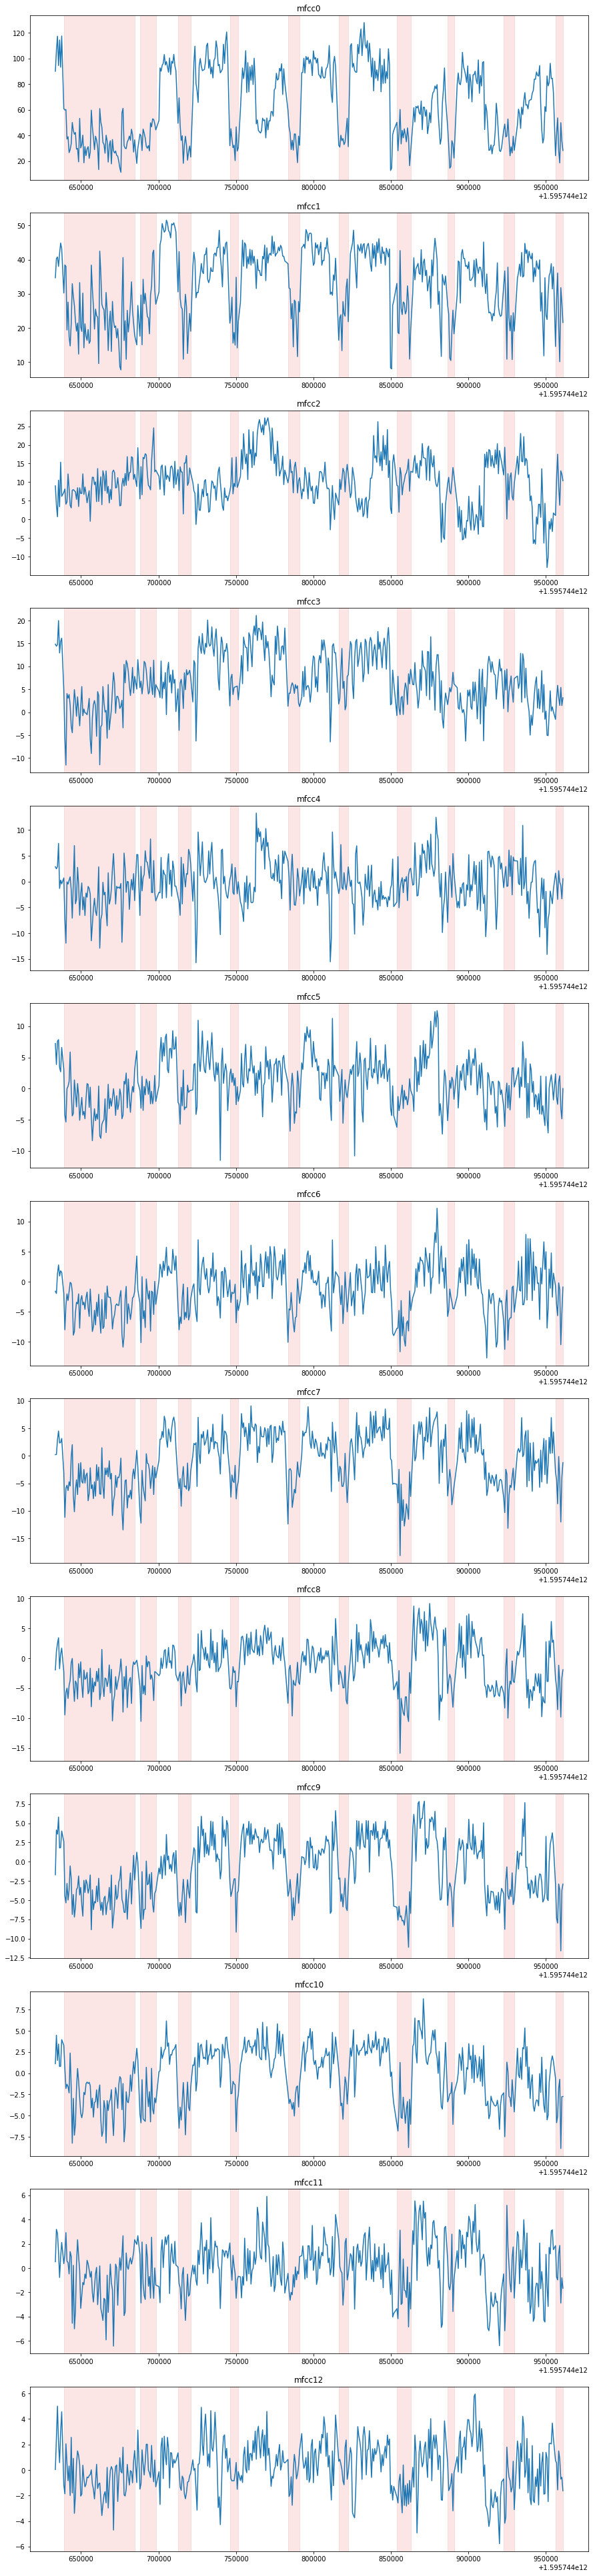

In [176]:
MFCC_DIVIDE_FACTOR = 2
MFCC_PART = 0
N_MFCC = 13
plotFeatureArray(MFCC_PART, MFCC_DIVIDE_FACTOR, N_MFCC, FEATURES['MFCC'])

## Set up plot function for single-value feature

Ploting value of a feature and its different between value from previous sample.

Area shaded in pink shows when Chloe is speaking. Non-shaded area is when background music is playing.

In [152]:
# Plot feature value and its difference between neighboring values
def plotFeature(sub_part, divide_factor, feature, delta, feature_name):
    fig, ax = plt.subplots(2, 1, figsize=(15,15))

    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)

    feature_split = np.array_split(feature, divide_factor)
    delta_split = np.array_split(delta, divide_factor)

    # Plot feature values
    min_val = np.amin(feature_split[sub_part])
    max_val = np.amax(feature_split[sub_part])
    padding = get_padding(min_val, max_val)
    ylim_1 = [ (min_val - padding), (max_val + padding)]
    ax[0].set_title(feature_name)
    ax[0].set_ylim(ylim_1)
    ax[0].plot(time_split[sub_part], feature_split[sub_part], color='dodgerblue')
    ax[0].fill_between(
        time_split[sub_part],
        ylim_1[0], ylim_1[1],
        where=label_split[sub_part] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Delta (max diff between current and previous 2 values)
    min_val = np.amin(delta_split[sub_part])
    max_val = np.amax(delta_split[sub_part])
    ylim_2 = [ min_val - padding, max_val + padding]
    ax[1].set_title('Delta ' + feature_name)
    ax[1].set_ylim(ylim_2)
    ax[1].plot(time_split[sub_part], delta_split[sub_part], color='darkorange')
    ax[1].fill_between(
        time_split[sub_part],
        ylim_2[0], ylim_2[1],
        where=label_split[sub_part] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Show plot
    plt.show()

## RMS

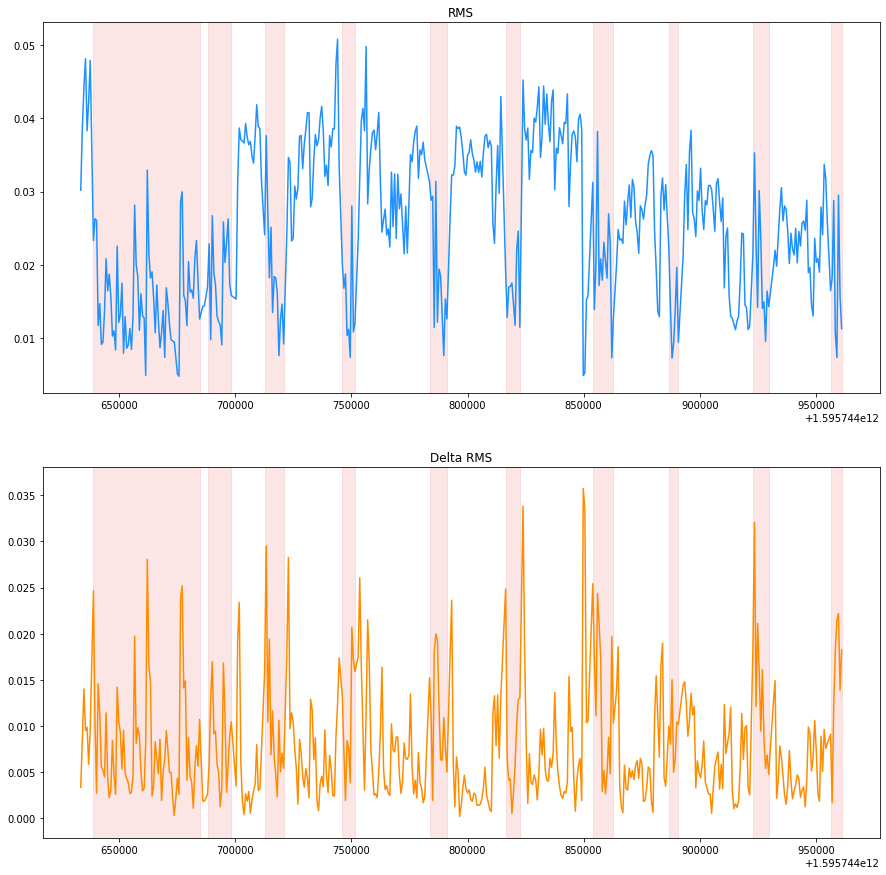

In [153]:
RMS_DIVIDE_FACTOR = 2
RMS_PART = 0
rms = df[FEATURES['RMS']]
delta_rms = df[FEATURES['DELTA_RMS']]

plotFeature(RMS_PART, RMS_DIVIDE_FACTOR, rms, delta_rms, 'RMS')

## Energy

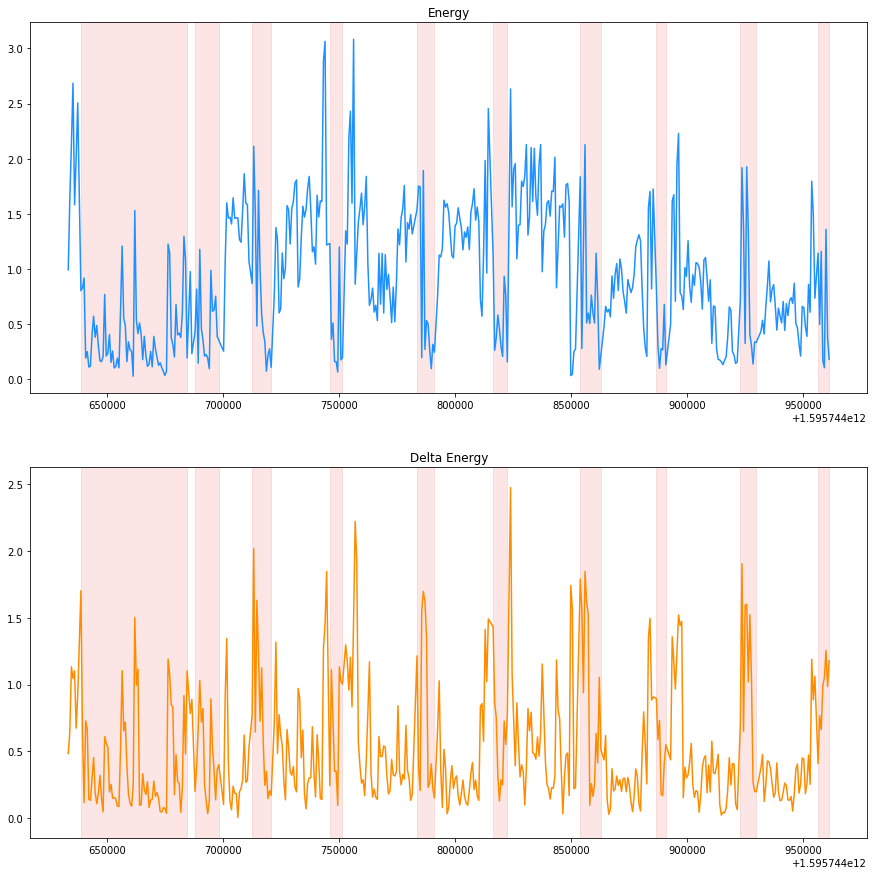

In [154]:
ENERGY_DIVIDE_FACTOR = 2
ENERGY_PART = 0
energy = df[FEATURES['ENERGY']]
delta_energy = df[FEATURES['DELTA_ENERGY']]

plotFeature(ENERGY_PART, ENERGY_DIVIDE_FACTOR, energy, delta_energy, 'Energy')

## Spectral Centroid

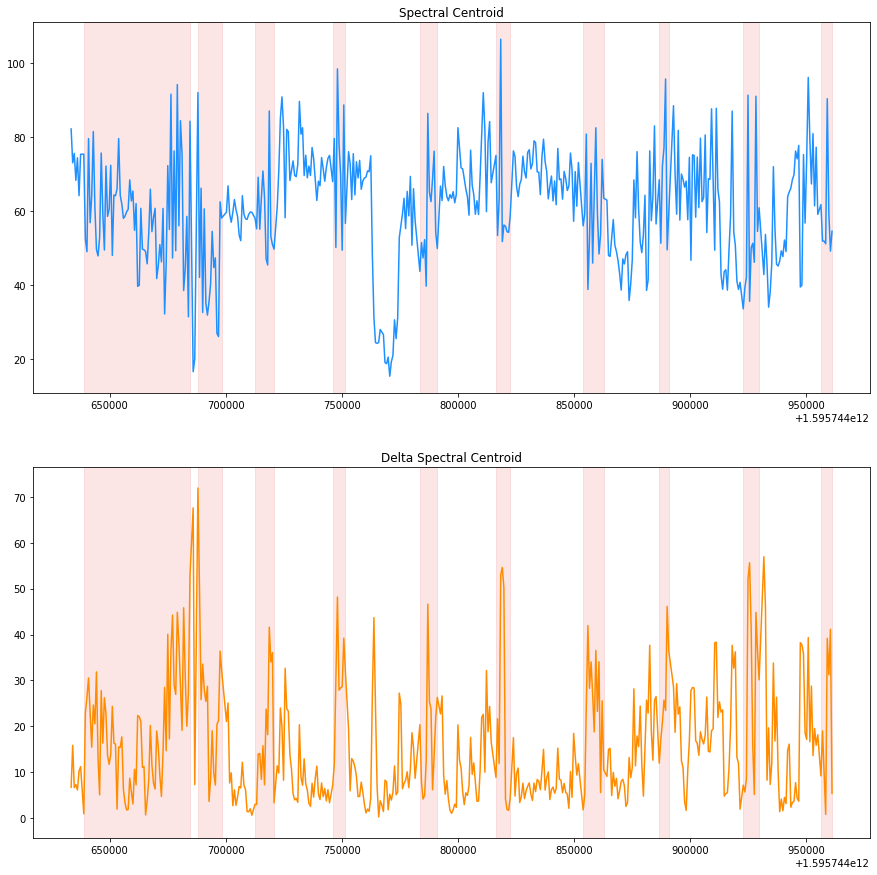

In [155]:
SP_CENTROID_DIVIDE_FACTOR = 2
SP_CENTROID_PART = 0
sp_centriod = df[FEATURES['SPECTRAL_CENTROID']]
delta_sp_centriod = df[FEATURES['DELTA_SPECTRAL_CENTROID']]

plotFeature(SP_CENTROID_PART, SP_CENTROID_DIVIDE_FACTOR, sp_centriod, delta_sp_centriod, 'Spectral Centroid')

## Spectral Flatness

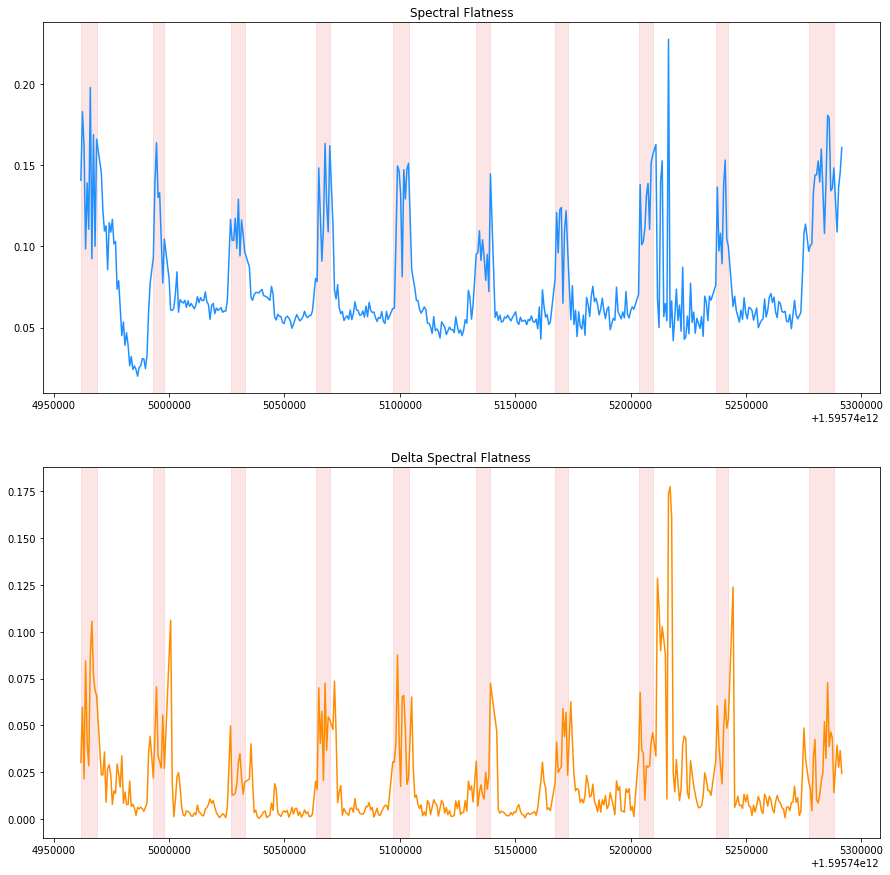

In [156]:
SP_FLATNESS_DIVIDE_FACTOR = 2
SP_FLATNESS_PART = 1
sp_flatness = df[FEATURES['SPECTRAL_FLATNESS']]
delta_sp_flatness = df[FEATURES['DELTA_SPECTRAL_FLATNESS']]

plotFeature(SP_FLATNESS_PART, SP_FLATNESS_DIVIDE_FACTOR, sp_flatness, delta_sp_flatness, 'Spectral Flatness')

## Spectral Rolloff

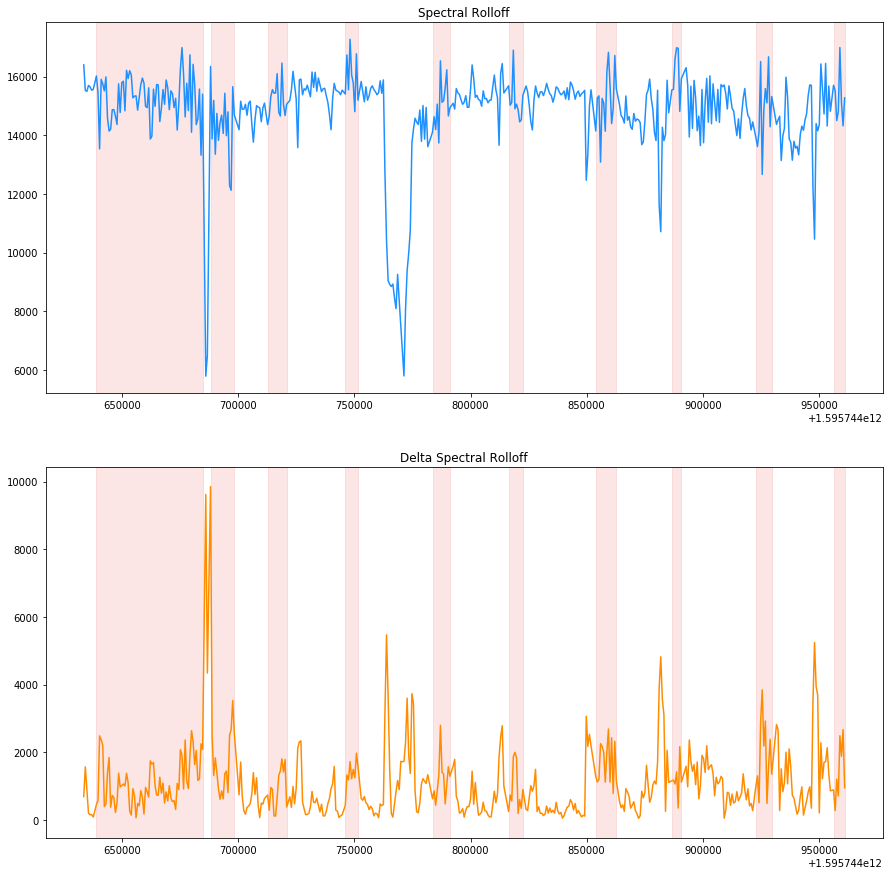

In [157]:
SP_ROLLOFF_DIVIDE_FACTOR = 2
SP_ROLLOFF_PART = 0
sp_rolloff = df[FEATURES['SPECTRAL_ROLLOFF']]
delta_sp_rolloff = df[FEATURES['DELTA_SPECTRAL_ROLLOFF']]

plotFeature(SP_ROLLOFF_PART, SP_ROLLOFF_DIVIDE_FACTOR, sp_rolloff, delta_sp_rolloff, 'Spectral Rolloff')

## Spectral Skewness

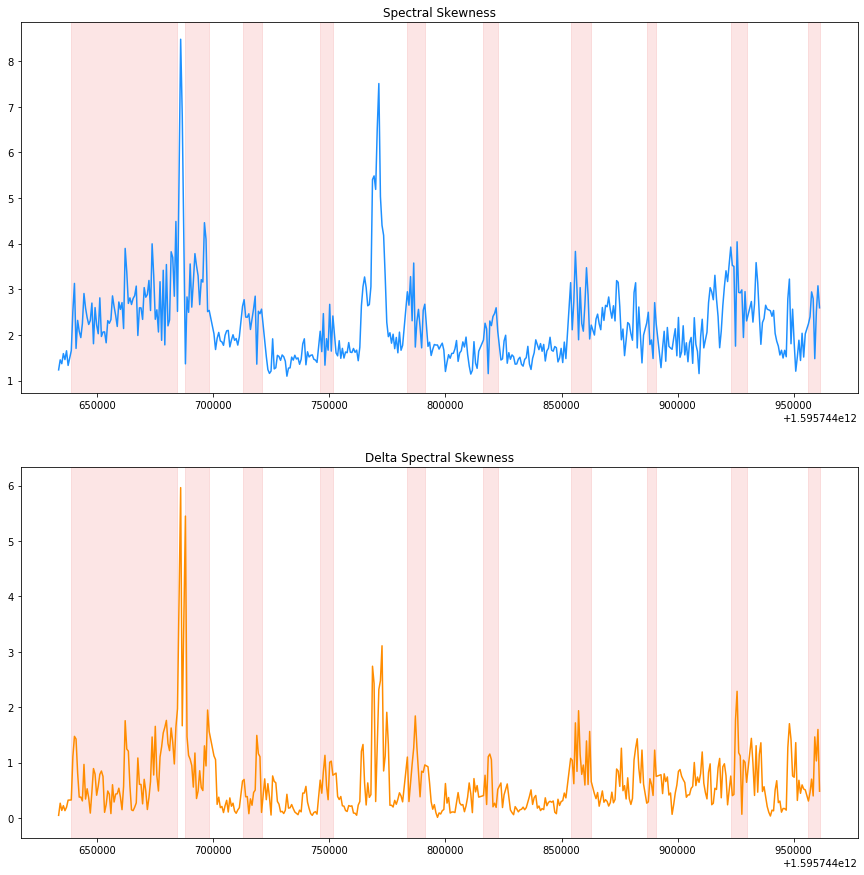

In [158]:
SP_SKEWNESS_DIVIDE_FACTOR = 2
SP_SKEWNESS_PART = 0
sp_skewness = df[FEATURES['SPECTRAL_SKEWNESS']]
delta_sp_skewness = df[FEATURES['DELTA_SPECTRAL_SKEWNESS']]

plotFeature(SP_SKEWNESS_PART, SP_SKEWNESS_DIVIDE_FACTOR, sp_skewness, delta_sp_skewness, 'Spectral Skewness')

##  Perceptual Spread

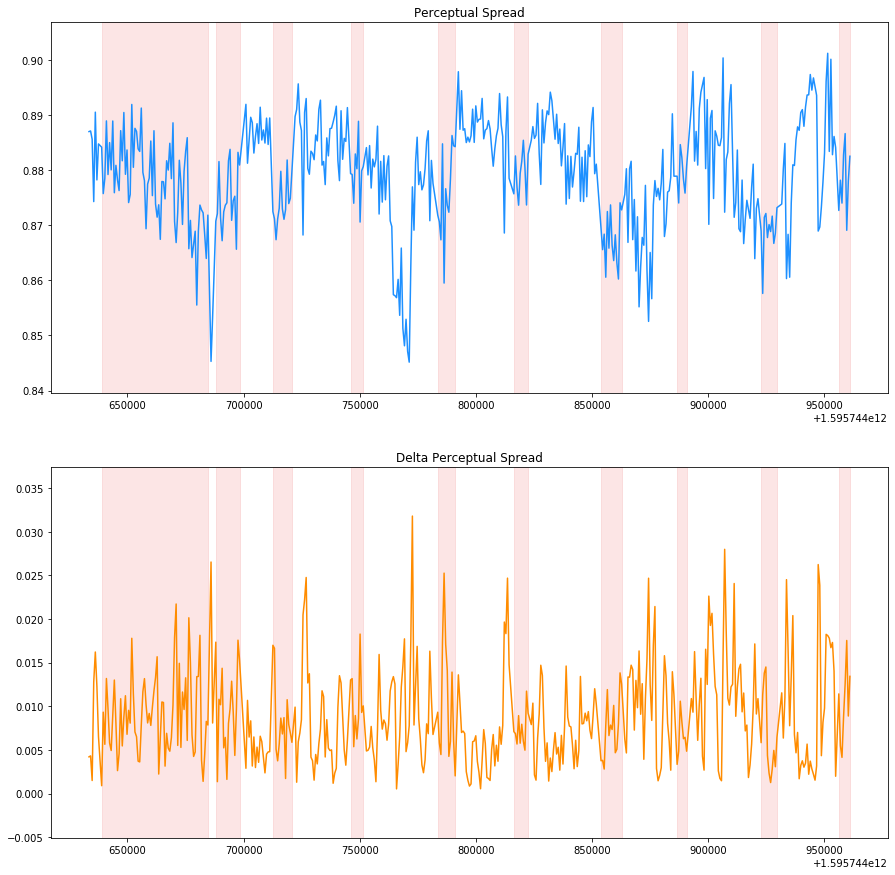

In [146]:
PC_SPREAD_DIVIDE_FACTOR = 2
PC_SPREAD_PART = 0
pc_spread = df[FEATURES['PERCEPTUAL_SPREAD']]
delta_pc_spread = df[FEATURES['DELTA_PERCEPTUAL_SPREAD']]

plotFeature(PC_SPREAD_PART, PC_SPREAD_DIVIDE_FACTOR, pc_spread, delta_pc_spread, 'Perceptual Spread')

## Perceptual Sharpness

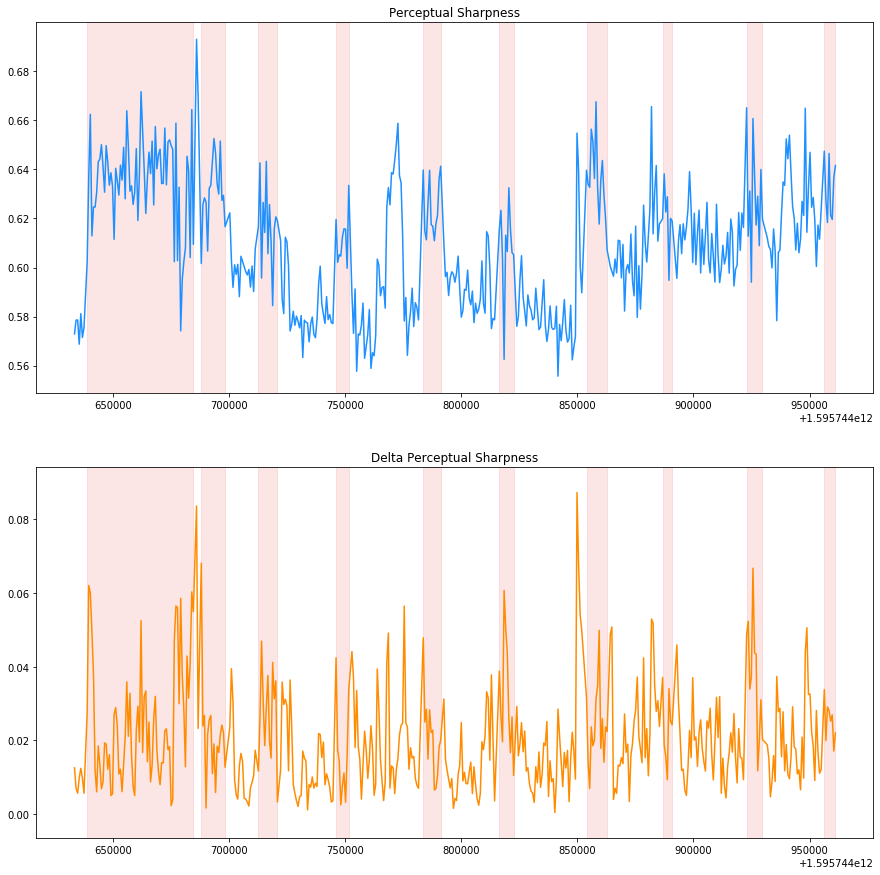

In [159]:
PC_SHARPNESS_DIVIDE_FACTOR = 2
PC_SHARPNESS_PART = 0
pc_sharpness = df[FEATURES['PERCEPTUAL_SHARPNESS']]
delta_pc_sharpness = df[FEATURES['DELTA_PERCEPTUAL_SHARPNESS']]

plotFeature(PC_SHARPNESS_PART, PC_SHARPNESS_DIVIDE_FACTOR, pc_sharpness, delta_pc_sharpness, 'Perceptual Sharpness')